# Demo for Evaluation Result
by Xinyi Liu Apr 10 

...some modules and settings for this demo:

In [1]:
from evo.tools import log
log.configure_logging()

In [34]:
from evo.tools import plot
from evo.tools.plot import PlotMode
from evo.core.metrics import PoseRelation, Unit
from evo.tools.settings import SETTINGS

# temporarily override some package settings
SETTINGS.plot_figsize = [6, 6]
SETTINGS.plot_split = True
SETTINGS.plot_usetex = False

# magic plot configuration
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

In [35]:
# interactive widgets configuration
import ipywidgets

check_opts_ape = {"align": False, "correct_scale": False, "show_plot": True}
check_boxes_ape=[ipywidgets.Checkbox(description=desc, value=val) for desc, val in check_opts_ape.items()]
check_opts_rpe = {"align": False, "correct_scale": False, "all_pairs": False, "show_plot": True}
check_boxes_rpe=[ipywidgets.Checkbox(description=desc, value=val) for desc, val in check_opts_rpe.items()]
delta_input = ipywidgets.FloatText(value=1.0, description='delta', disabled=False, color='black')
delta_unit_selector=ipywidgets.Dropdown(
    options={u.value: u for u in Unit if u is not Unit.seconds},
    value=Unit.frames, description='delta_unit'
)
plotmode_selector=ipywidgets.Dropdown(
    options={p.value: p for p in PlotMode},
    value=PlotMode.xy, description='plot_mode'
)
pose_relation_selector=ipywidgets.Dropdown(
    options={p.value: p for p in PoseRelation},
    value=PoseRelation.translation_part, description='pose_relation'
)

---

## Load trajectories

In [36]:
from evo.tools import file_interface
from evo.core import sync
import evo.main_ape as main_ape
import numpy as np
import matplotlib.pyplot as plt

1. **load TUM files with** 3D position and orientation quaternion per line ($x$ $y$ $z$ $q_x$ $q_y$ $q_z$ $q_w$)
2. Grid search to find a time offset value that minimizes rmse
3. Save the parameters for visualization

In [57]:
traj_ref_raw = file_interface.read_tum_trajectory_file("Groundtruth/GT.txt")
# traj_est_raw = file_interface.read_tum_trajectory_file("OKVIS_Output/enhanced_1.txt")
# traj_est_raw = file_interface.read_tum_trajectory_file("ORBSLAM_Output/Monocular-Inertial/enhanced_1.txt")
traj_est_raw = file_interface.read_tum_trajectory_file("ORBSLAM_Output/Monocular-Inertial-new/Harbor_01/Enhanced_Version/enhanced_harbor1.txt")
# traj_est_raw = file_interface.read_tum_trajectory_file("ORBSLAM_Output/Monocular-Inertial-new/Harbor_01/Unenhanced_Version/unenhanced_harbor1.txt")



# traj_ref, traj_est = sync.associate_trajectories(traj_ref, traj_est,max_diff=max_diff, offset_2=0)

# we are searching through offset region to find the minimum rmse for each categories
vals = np.logspace(4,8)
print(vals)
results = np.zeros(vals.shape[0])
for i in range(vals.shape[0]):
    val = vals[i]
    try:
        traj_ref, traj_est = sync.associate_trajectories(traj_ref_raw, traj_est_raw, max_diff=max_diff, offset_2=val)
        result = main_ape.ape(traj_ref, traj_est, PoseRelation.translation_part, align=True, correct_scale=True)

        if result.trajectories["estimate"].num_poses >= 300:
            print("good matching")
            results[i] = result.stats["rmse"]
        else:
            print("poor matching")
            results[i] = np.NaN
    except:
        results[i] = np.NaN

print(result.stats)

[1.00000000e+04 1.20679264e+04 1.45634848e+04 1.75751062e+04
 2.12095089e+04 2.55954792e+04 3.08884360e+04 3.72759372e+04
 4.49843267e+04 5.42867544e+04 6.55128557e+04 7.90604321e+04
 9.54095476e+04 1.15139540e+05 1.38949549e+05 1.67683294e+05
 2.02358965e+05 2.44205309e+05 2.94705170e+05 3.55648031e+05
 4.29193426e+05 5.17947468e+05 6.25055193e+05 7.54312006e+05
 9.10298178e+05 1.09854114e+06 1.32571137e+06 1.59985872e+06
 1.93069773e+06 2.32995181e+06 2.81176870e+06 3.39322177e+06
 4.09491506e+06 4.94171336e+06 5.96362332e+06 7.19685673e+06
 8.68511374e+06 1.04811313e+07 1.26485522e+07 1.52641797e+07
 1.84206997e+07 2.22299648e+07 2.68269580e+07 3.23745754e+07
 3.90693994e+07 4.71486636e+07 5.68986603e+07 6.86648845e+07
 8.28642773e+07 1.00000000e+08]
APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	4.135087
      mean	1.902721
    median	1.740855
       min	0.462745
      rmse	2.110619
       sse	2098.168994
       std	0.913434

good matching
APE w.r.t. tr

good matching
APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	4.340816
      mean	1.888118
    median	1.674355
       min	0.460612
      rmse	2.104062
       sse	2133.850261
       std	0.928485

good matching
APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	4.340816
      mean	1.888118
    median	1.674355
       min	0.460612
      rmse	2.104062
       sse	2133.850261
       std	0.928485

good matching
APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	4.340816
      mean	1.888118
    median	1.674355
       min	0.460612
      rmse	2.104062
       sse	2133.850261
       std	0.928485

good matching
APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	4.340816
      mean	1.888118
    median	1.674355
       min	0.460612
      rmse	2.104062
       sse	2133.850261
       std	0.928485

good matching
APE w.r.t. translation part (m)
(with Sim(3) Umeyama alignment)

       max	4.340816
      mea

[2.11061869 2.11061869 2.11061869 2.11061869 2.11061869 2.11061869
 2.11061869 2.11061869 2.1127727  2.1127727  2.11046368 2.11215962
 2.11215962 2.11215962 2.11100649 2.1101996  2.11038627 2.11228485
 2.11195963 2.10869617 2.11290501 2.115901   2.11358358 2.12010841
 2.12658713 2.11350182 2.09928225 2.09104348 2.09539596 2.09693893
 2.1025883  2.10495577 2.1040616  2.1040616  2.1040616  2.1040616
 2.1040616  2.1040616  2.1040616  2.1040616  2.1040616  2.1040616
 2.1040616  2.1040616  2.1040616  2.1040616  2.10663961 2.10663961
 2.10663961 2.09621057]


1599858.7196060573

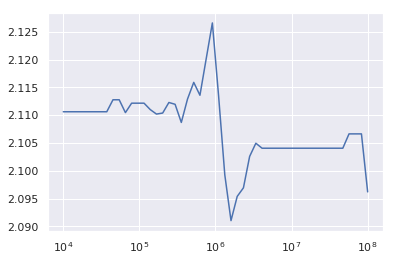

In [56]:
print(results)
plt.plot(vals, results)
plt.xscale('log')
# plt.show()
vals[np.argmin(results)]

---

## APE

Algorithm and API explanation: [see here](metrics.py_API_Documentation.ipynb#ape_math)

### Interactive APE Demo
***Run the code below, configure the parameters in the GUI and press the update button.***

(uses the trajectories loaded above)

In [58]:
import evo.main_ape as main_ape
import evo.common_ape_rpe as common

count = 0
results = []

def callback_ape(pose_relation, align, correct_scale, plot_mode, show_plot):
    global results, count
    est_name="APE Test #{}".format(count)
    
    result = main_ape.ape(traj_ref, traj_est, est_name=est_name,
                          pose_relation=pose_relation, align=align, correct_scale=correct_scale)
    count += 1
    results.append(result)
    
    if show_plot:
        fig = plt.figure()
        ax = plot.prepare_axis(fig, plot_mode)
        plot.traj(ax, plot_mode, traj_ref, style="--", alpha=0.5)
        plot.traj_colormap(
            ax, result.trajectories[est_name], result.np_arrays["error_array"], plot_mode,
            min_map=result.stats["min"], max_map=result.stats["max"])
        
print(pose_relation_selector)

# ## opt parameters from grid search ##
# enhanced_1_okvis_toff= 8.7e8
# unenhanced_1_okvis_toff = 6.8e8
# enhanced_1_orb_toff = 1599858
# unenhanced_1_orb_toff = 2559547
# enhanced_1_orb_inertial_toff = 1599858
# unenhanced_1_orb_inertial_toff = 2559547
# max_diff=1e8
####


traj_ref_raw = file_interface.read_tum_trajectory_file("Groundtruth/GT.txt")
# traj_est_raw = file_interface.read_tum_trajectory_file("OKVIS_Output/enhanced_1.txt")
# traj_est_raw = file_interface.read_tum_trajectory_file("ORBSLAM_Output/Monocular/enhanced_1.txt")
# traj_est_raw = file_interface.read_tum_trajectory_file("ORBSLAM_Output/Monocular-Inertial/unenhanced_1.txt")
traj_est_raw = file_interface.read_tum_trajectory_file("ORBSLAM_Output/Monocular-Inertial-new/Harbor_01/Enhanced_Version/enhanced_harbor1.txt")
# traj_est_raw = file_interface.read_tum_trajectory_file("ORBSLAM_Output/Monocular-Inertial-new/Harbor_01/Unenhanced_Version/unenhanced_harbor1.txt")


traj_ref, traj_est = sync.associate_trajectories(traj_ref_raw, traj_est_raw, max_diff=max_diff, offset_2=enhanced_1_orb_inertial_toff)

_ = ipywidgets.interact_manual(callback_ape, pose_relation=pose_relation_selector, plot_mode=plotmode_selector,
                               **{c.description: c.value for c in check_boxes_ape})

Dropdown(description=u'pose_relation', options={'translation part': <PoseRelation.translation_part: 'translation part'>, 'rotation angle in degrees': <PoseRelation.rotation_angle_deg: 'rotation angle in degrees'>, 'rotation angle in radians': <PoseRelation.rotation_angle_rad: 'rotation angle in radians'>, 'rotation part': <PoseRelation.rotation_part: 'rotation part'>, 'full transformation': <PoseRelation.full_transformation: 'full transformation'>}, value=<PoseRelation.translation_part: 'translation part'>)


aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUncG9zZV9yZWxhdGlvbicsIG9wdGlvbnM9eyd0cmFuc2xhdGlvbiBwYXJ0JzogPFBvc2VSZWxhdGlvbi50cmFuc2zigKY=
